In [237]:
# Work with Data - the main Python libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, GridSearchCV

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Metrics
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter('ignore')

In [238]:
pd.set_option('max_colwidth', 200)

In [239]:
data = pd.read_csv('./kaggle_data/PB_All_2000_2021.csv', sep=';', header=0)
data

id        date    NH4  BSK5  Suspended     O2    NO3    NO2     SO4  \
0      1  17.02.2000  0.330  2.77       12.0  12.30   9.50  0.057  154.00   
1      1  11.05.2000  0.044  3.00       51.6  14.61  17.75  0.034  352.00   
2      1  11.09.2000  0.032  2.10       24.5   9.87  13.80  0.173  416.00   
3      1  13.12.2000  0.170  2.23       35.6  12.40  17.13  0.099  275.20   
4      1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.60   
...   ..         ...    ...   ...        ...    ...    ...    ...     ...   
2856  22  06.10.2020  0.046  2.69        3.6   8.28   3.80  0.038  160.00   
2857  22  27.10.2020  0.000  1.52        0.5  11.26   0.56  0.031  147.20   
2858  22  03.12.2020  0.034  0.29        0.8  11.09   2.58  0.042  209.92   
2859  22  12.01.2021  0.000  2.10        0.0  14.31   3.94  0.034  121.60   
2860  22  10.02.2021  0.000  1.78        0.0  14.30   6.30  0.033  134.40   

        PO4       CL  
0     0.454   289.50  
1     0.090  1792.00  
2     0.200  2509.00  
3     0.377  1264.00  
4     0.134  1462.00  
...     ...      ...  
2856  0.726    77.85  
2857  0.634    71.95  
2858  0.484    61.17  
2859  0.424    63.49  
2860  0.582    66.31  

[2861 rows x 11 columns]

In [240]:
# Information for training data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [241]:
# Download data about monitoring stations
data_about = pd.read_csv('./kaggle_data/PB_stations.csv', sep=';', header=0, encoding='cp1251')
data_about.sort_values(by=['length'], ascending=False)["name_station"]

20                                                           р. Південний Буг, 773 км, смт. Чорний Острів, Мар'янівське вдсх.
19                                                              р. Південний Буг, 755 км, м. Хмельницький , Хмельницьке вдсх.
18                                                                р. Південний Буг, 744 км, с. Копистин, нижче м.Хмельницький
17                                                               р. Південний Буг, 711 км,  смт. Меджибіж, Меджибіжське вдсх.
16                                                                     р. Південний Буг, 692 км, с. Щедрове, Щедрівське вдсх.
15                                                              р. Південний Буг, 652 км, м. Хмільник, питний в/з, вище міста
14                                            р. Південний Буг, 607 км, с. Гущинці, нижче села , питний водозабір м.Калинівка
13                                      р. Південний Буг, 582 км, м. Вінниця, Сабарівське вдсх,  питний в/з міста, вищ

<AxesSubplot:>

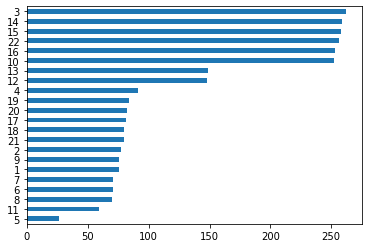

In [242]:
data['id'].value_counts().sort_values().plot(kind='barh')

In [243]:
data['ds'] = pd.to_datetime(data['date'])
data['year'] = data['ds'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   object        
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
 11  ds         2861 non-null   datetime64[ns]
 12  year       2861 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 290.7+ KB


In [244]:
date_lim = pd.concat([data[['id', 'year']].groupby(by=['id']).min().sort_values(by=['year'], ascending=False), data[['id', 'year']].groupby(by=['id']).max().sort_values(by=['year'], ascending=False)], axis=1, join='outer')

In [245]:
date_lim

year  year
id            
5   2019  2021
13  2006  2018
1   2000  2018
21  2000  2018
20  2000  2018
19  2000  2018
18  2000  2018
17  2000  2018
16  2000  2021
15  2000  2021
14  2000  2021
12  2000  2018
2   2000  2018
11  2000  2018
10  2000  2021
9   2000  2018
8   2000  2018
7   2000  2018
6   2000  2018
4   2000  2018
3   2000  2021
22  2000  2021

In [357]:
# Information about stations 14, 15, 16
stations_good = [14,15,16]
# stations_good = [i for i in range(12,22)]
data_about[data_about['id'].isin(stations_good)]

id  length  \
13  14   582.0   
14  15   607.0   
15  16   652.0   

                                                                             name_station  
13  р. Південний Буг, 582 км, м. Вінниця, Сабарівське вдсх,  питний в/з міста, вище міста  
14        р. Південний Буг, 607 км, с. Гущинці, нижче села , питний водозабір м.Калинівка  
15                          р. Південний Буг, 652 км, м. Хмільник, питний в/з, вище міста

In [391]:
# Set target indicator
# target_data_name = 'BSK5'
# feature_target_all = ['NH4', 'Suspended', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
feature_target_all = ['NH4', 'NO3','Suspended']
feature_data_all = feature_target_all + [target_data_name]
feature_data_all

['NH4', 'NO3', 'Suspended', 'BSK5']

In [392]:
# Data sampling only for good stations
df_indicator = data[['id', 'ds'] + feature_data_all]
df_indicator = df_indicator[df_indicator['id'].isin(stations_good)].dropna().reset_index(drop=True)
df_indicator

id         ds   NH4   NO3  Suspended  BSK5
0    14 2000-10-01  1.30  6.30        9.0   1.9
1    14 2000-01-02  2.20  8.80        8.0   2.5
2    14 2000-01-03  0.68  8.80       11.0   4.1
3    14 2000-04-04  0.81  4.60       13.0   3.4
4    14 2000-05-16  0.27  3.00       10.0   3.0
..   ..        ...   ...   ...        ...   ...
757  16 2020-06-10  0.28  1.90       12.0   5.6
758  16 2020-03-11  0.07  2.06        9.0   6.2
759  16 2020-08-12  0.17  3.38       13.0   5.6
760  16 2021-03-16  2.29  7.70        9.0   4.4
761  16 2021-06-04  0.16  6.38        9.0   6.1

[762 rows x 6 columns]

In [393]:
cols = []
for station in stations_good:
    for feature in feature_data_all:
        cols.append(str(station) + "_" + feature)
cols

['14_NH4',
 '14_NO3',
 '14_Suspended',
 '14_BSK5',
 '15_NH4',
 '15_NO3',
 '15_Suspended',
 '15_BSK5',
 '16_NH4',
 '16_NO3',
 '16_Suspended',
 '16_BSK5']

In [394]:
df = pd.pivot_table(df_indicator, index=["ds"], columns=["id"], values=feature_data_all).dropna()
df.columns = cols
df

14_NH4  14_NO3  14_Suspended  14_BSK5  15_NH4  15_NO3  \
ds                                                                  
2000-01-02     2.5     2.7           3.1     2.20    2.20    2.40   
2000-01-03     4.1     4.4           6.0     0.68    0.87    0.54   
2000-01-08     2.9     3.4           9.3     0.37    0.25    0.14   
2000-04-04     3.4     3.1           3.4     0.81    1.22    0.51   
2000-04-07     4.4     5.3           7.6     0.10    0.07    0.14   
...            ...     ...           ...      ...     ...     ...   
2020-09-15     6.8     6.9           7.4     0.26    0.25    0.16   
2020-10-06     8.6     6.2           8.0     0.38    0.28    0.30   
2020-12-08     6.2     6.8           6.0     0.57    0.28    0.20   
2021-03-16     6.2     4.2           4.4     1.03    1.38    2.29   
2021-06-04     5.6     6.2           6.1     0.43    0.17    0.16   

            15_Suspended  15_BSK5  16_NH4  16_NO3  16_Suspended  16_BSK5  
ds                                                                        
2000-01-02          8.80     8.40    7.70     8.0          12.0      9.0  
2000-01-03          8.80     9.10    8.80    11.0          17.0      9.0  
2000-01-08          1.50     7.00    0.90    18.0          20.0     22.0  
2000-04-04          4.60     4.90    3.50    13.0          12.0     18.0  
2000-04-07          2.30     2.10    1.70    15.0          18.0     17.0  
...                  ...      ...     ...     ...           ...      ...  
2020-09-15          1.03     0.57    0.84    15.0          13.0     10.0  
2020-10-06          0.24     0.44    0.96     6.0           9.0      7.0  
2020-12-08          0.68     1.03    0.71    18.0          10.0     12.0  
2021-03-16         10.90     8.56    7.70     8.0          10.0      9.0  
2021-06-04          6.57     8.07    6.38     8.0           8.0      9.0  

[237 rows x 12 columns]

<AxesSubplot:xlabel='ds'>

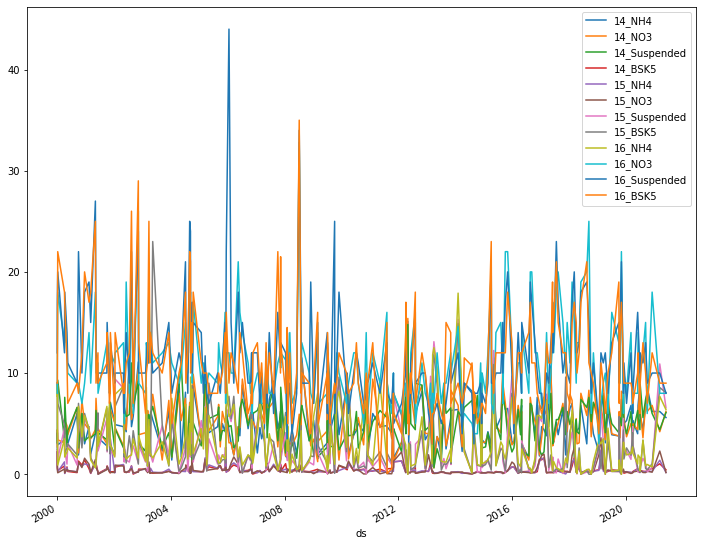

In [395]:
# Data visualization
df.plot(figsize=(12,10))

In [396]:
# EDA with Pandas Profiling
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [397]:
df

14_NH4  14_NO3  14_Suspended  14_BSK5  15_NH4  15_NO3  \
ds                                                                  
2000-01-02     2.5     2.7           3.1     2.20    2.20    2.40   
2000-01-03     4.1     4.4           6.0     0.68    0.87    0.54   
2000-01-08     2.9     3.4           9.3     0.37    0.25    0.14   
2000-04-04     3.4     3.1           3.4     0.81    1.22    0.51   
2000-04-07     4.4     5.3           7.6     0.10    0.07    0.14   
...            ...     ...           ...      ...     ...     ...   
2020-09-15     6.8     6.9           7.4     0.26    0.25    0.16   
2020-10-06     8.6     6.2           8.0     0.38    0.28    0.30   
2020-12-08     6.2     6.8           6.0     0.57    0.28    0.20   
2021-03-16     6.2     4.2           4.4     1.03    1.38    2.29   
2021-06-04     5.6     6.2           6.1     0.43    0.17    0.16   

            15_Suspended  15_BSK5  16_NH4  16_NO3  16_Suspended  16_BSK5  
ds                                                                        
2000-01-02          8.80     8.40    7.70     8.0          12.0      9.0  
2000-01-03          8.80     9.10    8.80    11.0          17.0      9.0  
2000-01-08          1.50     7.00    0.90    18.0          20.0     22.0  
2000-04-04          4.60     4.90    3.50    13.0          12.0     18.0  
2000-04-07          2.30     2.10    1.70    15.0          18.0     17.0  
...                  ...      ...     ...     ...           ...      ...  
2020-09-15          1.03     0.57    0.84    15.0          13.0     10.0  
2020-10-06          0.24     0.44    0.96     6.0           9.0      7.0  
2020-12-08          0.68     1.03    0.71    18.0          10.0     12.0  
2021-03-16         10.90     8.56    7.70     8.0          10.0      9.0  
2021-06-04          6.57     8.07    6.38     8.0           8.0      9.0  

[237 rows x 12 columns]

In [398]:
# Set target data
target_name = '14_' + target_data_name
target_data = df.pop(target_name)
target_data

ds
2000-01-02    2.20
2000-01-03    0.68
2000-01-08    0.37
2000-04-04    0.81
2000-04-07    0.10
              ... 
2020-09-15    0.26
2020-10-06    0.38
2020-12-08    0.57
2021-03-16    1.03
2021-06-04    0.43
Name: 14_BSK5, Length: 237, dtype: float64

In [399]:
# Dividing data into training and test
train, test, target, target_test = train_test_split(df, target_data, test_size=0.25, random_state=0)
print(train.shape, test.shape)

(177, 11) (60, 11)


In [400]:
# Display the statistics for training data
train.describe()

14_NH4      14_NO3  14_Suspended      15_NH4      15_NO3  \
count  177.000000  177.000000    177.000000  177.000000  177.000000   
mean     5.026554    5.177740      5.131695    0.436768    0.460237   
std      2.289048    2.370207      2.101711    0.453284    0.498298   
min      1.200000    0.620000      0.630000    0.000000    0.000000   
25%      3.500000    3.460000      3.700000    0.190000    0.160000   
50%      4.600000    4.800000      5.000000    0.280000    0.260000   
75%      6.200000    6.400000      6.300000    0.470000    0.530000   
max     15.100000   15.400000     14.800000    3.500000    2.600000   

       15_Suspended     15_BSK5      16_NH4      16_NO3  16_Suspended  \
count    177.000000  177.000000  177.000000  177.000000    177.000000   
mean       3.004915    3.408983    3.493446   10.800565     11.409605   
std        2.920407    3.250086    2.949024    4.386349      5.476475   
min        0.000000    0.000000    0.000000    3.000000      3.000000   
25%        0.800000    0.950000    1.200000    8.000000      8.000000   
50%        1.900000    2.500000    2.550000   10.000000     10.000000   
75%        4.200000    4.900000    5.700000   13.000000     13.000000   
max       15.300000   23.000000   17.900000   32.800000     44.000000   

          16_BSK5  
count  177.000000  
mean    10.773220  
std      4.953954  
min      0.080000  
25%      8.000000  
50%     10.000000  
75%     12.000000  
max     35.000000

In [401]:
# Display the statistics for test data
test.describe()

14_NH4     14_NO3  14_Suspended     15_NH4     15_NO3  15_Suspended  \
count  60.000000  60.000000     60.000000  60.000000  60.000000     60.000000   
mean    5.195500   5.364667      5.092000   0.407367   0.435000      2.337900   
std     2.524811   2.327908      2.429672   0.396490   0.551193      2.698374   
min     1.600000   1.600000      1.040000   0.053000   0.025000      0.000000   
25%     3.250000   3.775000      3.175000   0.190000   0.167500      0.587500   
50%     5.200000   5.100000      4.800000   0.265000   0.235000      1.250000   
75%     6.325000   6.825000      6.600000   0.440000   0.490000      2.777500   
max    12.100000  11.500000     11.100000   2.400000   3.600000     12.230000   

         15_BSK5     16_NH4     16_NO3  16_Suspended    16_BSK5  
count  60.000000  60.000000  60.000000     60.000000  60.000000  
mean    2.436833   2.570667  11.208333     11.541667  11.233333  
std     2.677784   2.478353   4.424787      4.223915   4.542144  
min     0.000000   0.000000   3.500000      3.500000   5.000000  
25%     0.575000   0.997500   8.000000      9.000000   8.000000  
50%     1.500000   1.655000  10.000000     11.000000  10.000000  
75%     2.727500   3.050000  12.250000     14.000000  14.000000  
max    10.850000  11.800000  25.000000     25.000000  25.000000

In [402]:
# Standartization data
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)

# Display training data
train

14_NH4    14_NO3  14_Suspended    15_NH4    15_NO3  15_Suspended  \
0   -0.546118 -0.595616     -0.492276 -0.147717 -0.262106     -0.946009   
1   -0.143064 -0.244442      0.557460 -0.280460 -0.845737     -0.468697   
2   -0.011633 -0.413683      0.509745 -0.435326 -0.463358     -0.688467   
3    1.916016  2.124923      0.080307 -0.435326 -0.443233     -0.897934   
4   -0.624976 -0.286753     -0.492276 -0.966297 -0.926238     -0.242060   
..        ...       ...           ...       ...       ...           ...   
172 -0.362115 -0.879094     -0.205984  0.029273  0.019648      0.994142   
173 -0.362115 -0.329063     -0.578163 -0.479574 -0.604235     -0.932273   
174 -1.325940 -1.556056     -0.635422  1.290329  1.690042      1.852615   
175 -0.624976 -0.540613     -0.587706  0.737235  0.824657      0.685091   
176  1.390294  1.617202      1.177758 -0.833554 -0.765237     -0.585450   

      15_BSK5    16_NH4    16_NO3  16_Suspended   16_BSK5  
0   -0.965470 -1.051949  0.502850      0.657463  1.665360  
1   -0.369955  1.906549 -0.411657     -0.624357 -2.132257  
2   -0.851304 -0.813909  0.960103     -0.258123 -0.561387  
3   -0.792678 -0.555465 -0.640284     -0.990592 -0.763819  
4   -0.187906 -0.235811 -0.640284     -0.258123 -0.358956  
..        ...       ...       ...           ...       ...  
172  1.324024  0.750354  0.274223      5.967862 -0.358956  
173 -0.832790 -1.072352  0.502850      0.657463  1.665360  
174  1.540013  1.512082 -0.411657     -0.990592 -0.561387  
175  0.521775  1.158423  0.502850      0.474346 -0.358956  
176 -0.496463 -0.405840 -0.868911     -0.258123  0.248339  

[177 rows x 11 columns]

In [403]:
# Standartization data
test = pd.DataFrame(scaler.transform(test), columns = test.columns)

In [404]:
# Training data splitting to new training (part of the all training) and validation data
train_all = train.copy()
target_all = target.copy()
train, valid, target_train, target_valid = train_test_split(train_all, target_all, test_size=0.2, random_state=0)

In [405]:
# Display information about new training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 160 to 172
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   14_NH4        141 non-null    float64
 1   14_NO3        141 non-null    float64
 2   14_Suspended  141 non-null    float64
 3   15_NH4        141 non-null    float64
 4   15_NO3        141 non-null    float64
 5   15_Suspended  141 non-null    float64
 6   15_BSK5       141 non-null    float64
 7   16_NH4        141 non-null    float64
 8   16_NO3        141 non-null    float64
 9   16_Suspended  141 non-null    float64
 10  16_BSK5       141 non-null    float64
dtypes: float64(11)
memory usage: 13.2 KB


In [406]:
# Display information about validation data
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 54 to 44
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   14_NH4        36 non-null     float64
 1   14_NO3        36 non-null     float64
 2   14_Suspended  36 non-null     float64
 3   15_NH4        36 non-null     float64
 4   15_NO3        36 non-null     float64
 5   15_Suspended  36 non-null     float64
 6   15_BSK5       36 non-null     float64
 7   16_NH4        36 non-null     float64
 8   16_NO3        36 non-null     float64
 9   16_Suspended  36 non-null     float64
 10  16_BSK5       36 non-null     float64
dtypes: float64(11)
memory usage: 3.4 KB


In [407]:
# Cross-validation of training data with shuffle
cv_train = ShuffleSplit(n_splits=3, test_size=0.5, random_state=0)

In [408]:
# Creation the dataframe with the resulting score of all models
result = pd.DataFrame({'model' : ['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor'], 
                       'train_score': 0, 'valid_score': 0})
result

model  train_score  valid_score
0        Linear Regression            0            0
1  Random Forest Regressor            0            0
2        XGBoost Regressor            0            0

In [409]:
# Linear Regression
lr = LinearRegression()
lr.fit(train, target_train)

# Prediction for training data
y_train_lr = lr.predict(train)

# Accuracy of model
r2_score_acc = round(r2_score(target_train, y_train_lr), 2)
print(f'Accuracy of Linear Regression model training is {r2_score_acc}')

# Save to result dataframe
result.loc[result['model'] == 'Linear Regression', 'train_score'] = r2_score_acc

Accuracy of Linear Regression model training is 0.89


In [410]:
# Print rounded r2_lr = lr.predict(valid)
y_val_lr = lr.predict(valid)
r2_score_acc_valid = round(r2_score(target_valid, y_val_lr),2)
result.loc[result['model'] == 'Linear Regression', 'valid_score'] = r2_score_acc_valid
print(f'Accuracy of Linear Regression model prediction for valid dataset is {r2_score_acc_valid}')

Accuracy of Linear Regression model prediction for valid dataset is -0.91


In [411]:
%%time
# Random Forest Regressor
rf = RandomForestRegressor()
param_grid = {'n_estimators': [10, 20, 50], 'min_samples_leaf': [i for i in range(4,7)], 
              'max_features': ['auto'], 'max_depth': [i for i in range(3,6)], 
              'criterion': ['mse'], 'bootstrap': [False]}

# Training model
rf_CV = GridSearchCV(rf, param_grid=param_grid, cv=cv_train, verbose=False)
rf_CV.fit(train, target_train)
print(rf_CV.best_params_)

# Prediction for training data
y_train_rf = rf_CV.predict(train)

# Accuracy of model
r2_score_acc = round(r2_score(target_train, y_train_rf),2)
print(f'Accuracy of RandomForestRegressor model training is {r2_score_acc}')

# Save to result dataframe
result.loc[result['model'] == 'Random Forest Regressor', 'train_score'] = r2_score_acc

{'bootstrap': False, 'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 10}
Accuracy of RandomForestRegressor model training is 0.89
CPU times: user 1.98 s, sys: 11.6 ms, total: 1.99 s
Wall time: 1.99 s


In [412]:
# Print rounded r2_score_acc to 2 decimal values after the text
y_val_rf = rf_CV.predict(valid)
r2_score_acc_valid = round(r2_score(target_valid, y_val_rf),2)
result.loc[result['model'] == 'Random Forest Regressor', 'valid_score'] = r2_score_acc_valid
print(f'Accuracy of RandomForestRegressor model prediction for valid dataset is {r2_score_acc_valid}')

Accuracy of RandomForestRegressor model prediction for valid dataset is 0.06


In [413]:
%%time
# XGBoost Regressor
xgbr = xgb.XGBRegressor() 
# parameters = {'n_estimators': [60, 70, 80, 90, 95, 100, 105, 110, 120, 130, 140], 
#               'learning_rate': [0.005, 0.01, 0.05, 0.075, 0.1],
#               'max_depth': [3, 5, 7, 9],
#               'reg_lambda': [0.1, 0.3, 0.5]}

parameters = {'n_estimators': [60, 75, 100], 
              'learning_rate': [0.02, 0.05],
              'max_depth': [4, 5],
              'reg_lambda': [0.1, 0.3]}

# Training model
xgb_CV = GridSearchCV(estimator=xgbr, param_grid=parameters, cv=cv_train, n_jobs=-1)
xgb_CV.fit(train, target_train)
print("Best score: %0.3f" % xgb_CV.best_score_)
print("Best parameters set:", xgb_CV.best_params_)

# Prediction for training data
y_train_xgb = xgb_CV.predict(train)

# Accuracy of model
r2_score_acc = round(r2_score(target_train, y_train_xgb),2)
print(f'Accuracy of XGBoost Regressor model training is {r2_score_acc}')

# Save to result dataframe
result.loc[result['model'] == 'XGBoost Regressor', 'train_score'] = r2_score_acc

Best score: 0.791
Best parameters set: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 60, 'reg_lambda': 0.1}
Accuracy of XGBoost Regressor model training is 0.98
CPU times: user 20.3 s, sys: 33.4 ms, total: 20.3 s
Wall time: 2.75 s


In [414]:
# Print rounded r2_score_acc to 2 decimal values after the text
y_val_xgb = xgb_CV.predict(valid)
r2_score_acc_valid = round(r2_score(target_valid, y_val_xgb),2)
result.loc[result['model'] == 'XGBoost Regressor', 'valid_score'] = r2_score_acc_valid
print(f'Accuracy of XGBoost Regressor model prediction for valid dataset is {r2_score_acc_valid}')

Accuracy of XGBoost Regressor model prediction for valid dataset is -0.38


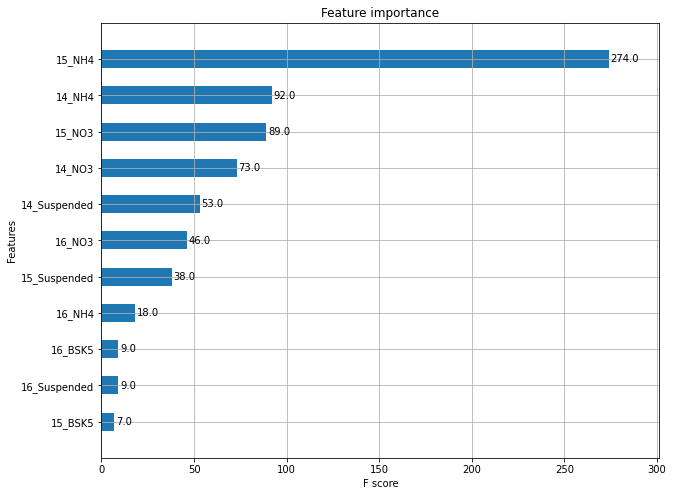

In [415]:
# Feature importance diagram
xgbr = xgb.XGBRegressor(**xgb_CV.best_params_)
xgbr.fit(train, target_train)
fig =  plt.figure(figsize = (10,8))
axes = fig.add_subplot(111)
xgb.plot_importance(xgbr,ax = axes,height = 0.5)
plt.show();
plt.close()

In [416]:
# Prediction of target for test data for all models
y_test_lr = lr.predict(test)
y_test_rf = rf_CV.predict(test)
y_test_xgb = xgb_CV.predict(test)

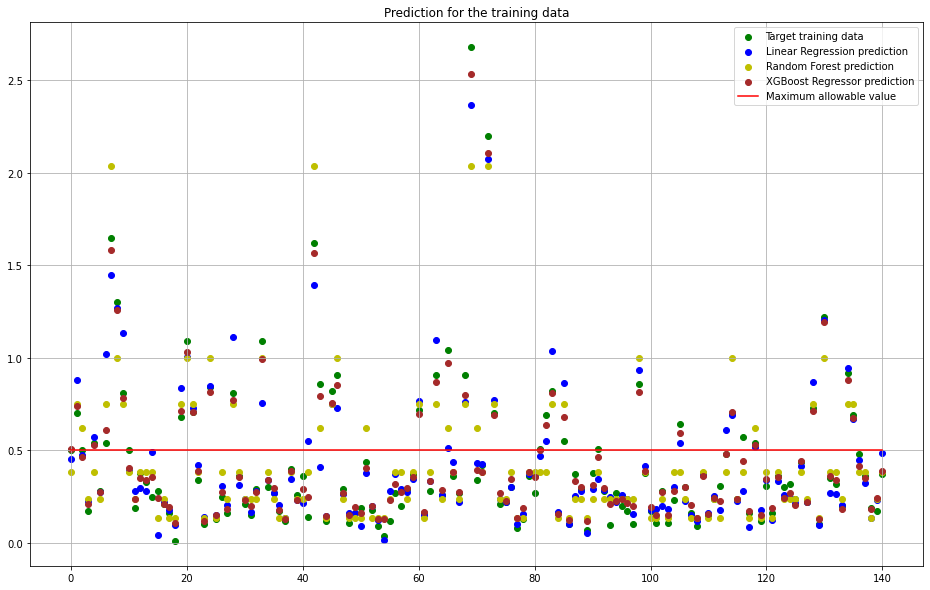

In [417]:
# Building plot for prediction for the training data 
x = np.arange(len(train))
plt.figure(figsize=(16,10))
plt.scatter(x, target_train, label = "Target training data", color = 'g')
plt.scatter(x, y_train_lr, label = "Linear Regression prediction", color = 'b')
plt.scatter(x, y_train_rf, label = "Random Forest prediction", color = 'y')
plt.scatter(x, y_train_xgb, label = "XGBoost Regressor prediction", color = 'brown')
plt.plot(x, np.full(len(train), 0.5), label = "Maximum allowable value", color = 'r')
plt.title('Prediction for the training data')
plt.legend(loc='best')
plt.grid(True)

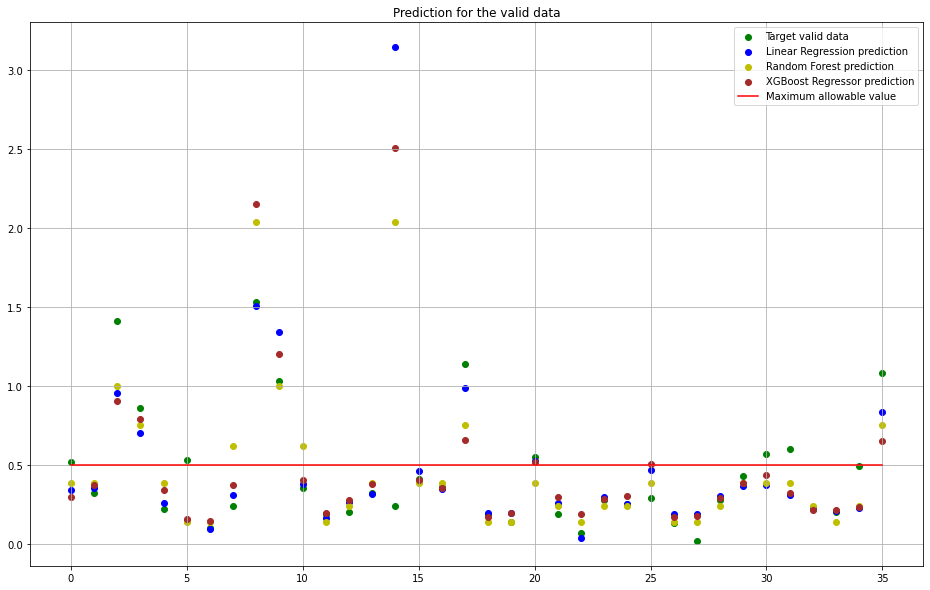

In [418]:
# Building plot for prediction for the valid data 
x = np.arange(len(valid))
plt.figure(figsize=(16,10))
plt.scatter(x, target_valid, label = "Target valid data", color = 'g')
plt.scatter(x, y_val_lr, label = "Linear Regression prediction", color = 'b')
plt.scatter(x, y_val_rf, label = "Random Forest prediction", color = 'y')
plt.scatter(x, y_val_xgb, label = "XGBoost Regressor prediction", color = 'brown')
plt.plot(x, np.full(len(valid), 0.5), label = "Maximum allowable value", color = 'r')
plt.title('Prediction for the valid data')
plt.legend(loc='best')
plt.grid(True)

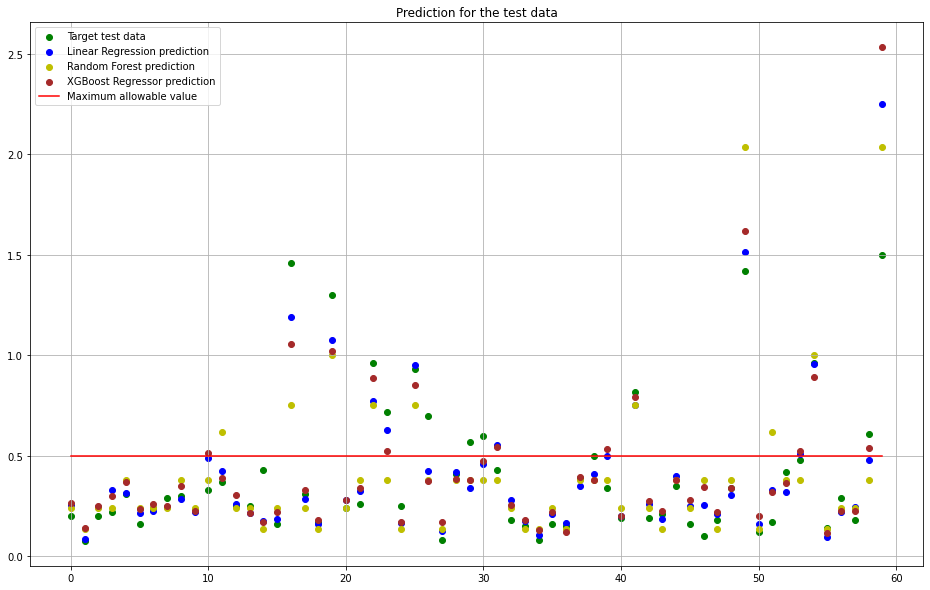

In [419]:
# Building plot for prediction for the test data 
x = np.arange(len(test))
plt.figure(figsize=(16,10))
plt.scatter(x, target_test, label = "Target test data", color = 'g')
plt.scatter(x, y_test_lr, label = "Linear Regression prediction", color = 'b')
plt.scatter(x, y_test_rf, label = "Random Forest prediction", color = 'y')
plt.scatter(x, y_test_xgb, label = "XGBoost Regressor prediction", color = 'brown')
plt.plot(x, np.full(len(test), 0.5), label = "Maximum allowable value", color = 'r')
plt.title('Prediction for the test data')
plt.legend(loc='best')
plt.grid(True)

In [420]:
# Display results of modeling
result.sort_values(by=['valid_score', 'train_score'], ascending=False)

model  train_score  valid_score
1  Random Forest Regressor         0.89         0.06
2        XGBoost Regressor         0.98        -0.38
0        Linear Regression         0.89        -0.91

In [421]:
# Select models
#result_best = result[(result['train_score'] - result['valid_score']).abs() < 0.15]
result_best = result
result_best.sort_values(by=['valid_score', 'train_score'], ascending=False)

model  train_score  valid_score
1  Random Forest Regressor         0.89         0.06
2        XGBoost Regressor         0.98        -0.38
0        Linear Regression         0.89        -0.91

In [422]:
# Select the best model
result_best.nlargest(1, 'valid_score')

model  train_score  valid_score
1  Random Forest Regressor         0.89         0.06

In [423]:
# Find a name of the best model (with maximal valid score)
best_model_name = result_best.loc[result_best['valid_score'].idxmax(result_best['valid_score'].max()), 'model']

In [424]:
print(f'The best model is "{best_model_name}"')

The best model is "Random Forest Regressor"
